Zip file extracted successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None
Dataset Description:
             show_id   type        title                director  \
count   6.234000e+03   6234         6234                    4265   
unique           NaN      2         6172                 

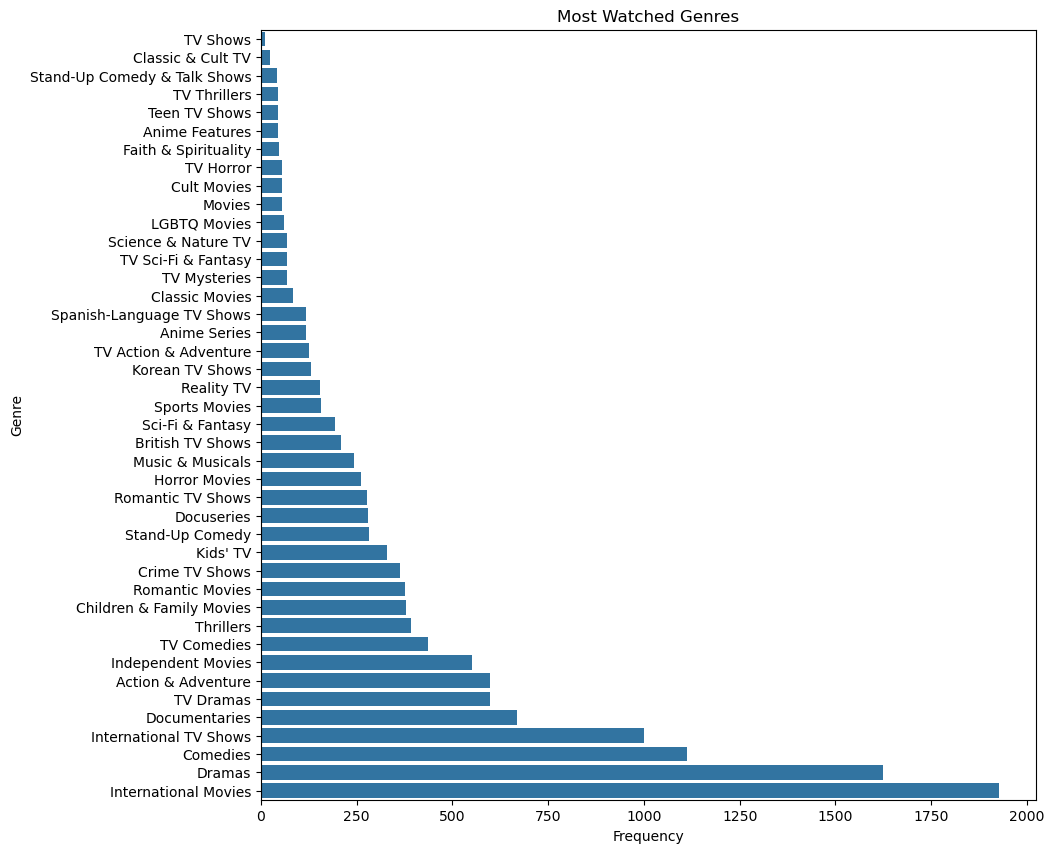


Rating Distribution:
| Rating   | Count   |   Percentage |
|:---------|:--------|-------------:|
| TV-14    | 1,698   |        27.24 |
| TV-Y     | 143     |         2.29 |
| TV-G     | 149     |         2.39 |
| TV-Y7    | 169     |         2.71 |
| PG       | 184     |         2.95 |
| NC-17    | 2       |         0.03 |
| TV-MA    | 2,037   |        32.68 |
| NR       | 218     |         3.5  |
| PG-13    | 286     |         4.59 |
| G        | 37      |         0.59 |
| R        | 508     |         8.15 |
| UR       | 7       |         0.11 |
| TV-PG    | 701     |        11.24 |
| TV-Y7-FV | 95      |         1.52 |


Cleaned data has been zipped and saved as cleaned_netflix_data.zip


In [1]:
# Loading Required Libraries
import pandas as pd
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Defining Path for Zipped file
try:
    # Defining Path for Zipped file
    file_path = r"C:\Users\tbaguma\netflix_data.zip"
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The specified file path does not exist: {file_path}")
    
    # Accessing the zipped file
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(".")
    print("Zip file extracted successfully.")
except FileNotFoundError as e:
    print(e)
    exit()
except zipfile.BadZipFile as e:
    print(f"Error: The file is not a valid zip file. Details: {e}")
    exit()
except Exception as e:
    print(f"Unexpected error during file extraction: {e}")
    exit()

# Reading the Csv File
df = pd.read_csv('netflix_data.csv', low_memory=False)
"""print(df.head())"""

# Summary of the dataframe
print(df.info())

# Dataset Description
print("Dataset Description:")
print(df.describe(include='all'))

# Check for missing values per column
print("\nSum of Missing Values per Column:")
missing_data = df.isnull().sum()
print(missing_data)

# Establishing most frequent rating - Rating Mode
most_frequent_rating = df['rating'].mode()[0]

# Replacing Missing Values
df['director'] = df['director'].fillna('Unknown') # Replacing missing values in Director column with "Unknown"
df['cast'] = df['cast'].fillna('Various Actors') # Replacing missing values in Cast column with "Various Actors"
df['country'] = df['country'].fillna('Unknown') # Replacing missing values in Country column with "Unknown"
df['date_added'] = df['date_added'].fillna('Not Available') # Replacing missing values in date_added column with "Not Available"
df['rating'] = df['rating'].fillna(most_frequent_rating) # Replacing missing values in rating column with the rating mode

# Testing for replaced missing values (Filter rows where cast is "Various actors")
various_actors_rows = df[df['cast'] == "Various Actors"]
print(various_actors_rows)

# Checking for duplicate records
duplicates = df.duplicated().sum()
print("\nDuplicate Records Analysis:")
print(f"\nNumber of duplicate rows: {duplicates}")

# Distribution of Genres - Table View
genres_list = df['listed_in'].str.split(', ').sum() # splitting combined strings in column into a list of individual genres
genre_counts = Counter(genres_list) # Count occurrences of each genre
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Frequency']) # Creating DataFrame for better presentation
total_genres = genre_df['Frequency'].sum()
genre_df['Percentage'] = (genre_df['Frequency'] / total_genres) * 100
genre_df = genre_df.sort_values(by='Frequency', ascending=True) # Sorting Frequency in ascending order
print("\nDistribution of Genres:")
print(genre_df.to_markdown(numalign="right", stralign="left", floatfmt=",.2f"))

# Distribution of Genres - Bar Plot
print("\nBar Plot showing the Distribution of Genres:")
plt.figure(figsize=(10, 10))
sns.barplot(x='Frequency', y=genre_df.index, data=genre_df)
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.title('Most Watched Genres')
plt.show()



# Rating Distribution - Table View
rating_counts = df['rating'].value_counts()
total_ratings = len(df)
rating_percentages = (rating_counts / total_ratings) * 100
rating_df = pd.DataFrame({
    'Rating': rating_counts.index,
    'Count': rating_counts.values,
    'Percentage': rating_percentages.round(2)  # Round percentages to 2 decimal places
})
rating_df['Count'] = rating_df['Count'].apply(lambda x: '{:,}'.format(x)) # adding comma seperator to count column
rating_df = rating_df.sort_values(by='Count', ascending=True) # arranging rating column by count in ascending order
print("\nRating Distribution:")
print(rating_df.to_markdown(index=False))

# Plotting Rating Distribution
plt.figure(figsize=(10, 10))
sns.countplot(x='rating', data=df, order=rating_counts.index)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Exporting the Cleaned Data to new CSV File to enable integrating visualizations in R
# 1. Export the cleaned DataFrame to a CSV file
output_file_path = "cleaned_netflix_data.csv"
df.to_csv(output_file_path, index=False)  # index=False to avoid writing row numbers

# 2. Create a zip file containing the cleaned CSV
zip_file_path = "cleaned_netflix_data.zip"

with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(output_file_path, os.path.basename(output_file_path))
os.remove(output_file_path)

print(f"Cleaned data has been zipped and saved as {zip_file_path}")